## **ZOMATO**

# ABSTRACT

 **Problem Statement**: 
Predict 'Rating' of Restaurants. 

**SOLUTION:*
This is a Regression problem.
In an overview, I started with **DATA CLEANING and DATA PROCESSING**. Then **ExtraTreesRegressor** was used to EXTRACT important FEATURES.
After data was ready for the model, to predict ratings, I started off with the most basic regression model which is **LINEAR REGRESSION**. Analyzing the need for improvement in predictions from linear regression, I decided to build an **unsupervised learning model before the supervised learning model**. So, **K MEANS CLUSTERING** was built before **LINEAR REGRESSION**. Now, for a test point, linear regression was performed only within its identified cluster given my kmeans. This improved the performance of linear regression. In the end **RANDOM FOREST REGRESSION** model was also built on the data to compare the performance of **ENSEMBLE SYSTEM** on this data set.

# CODE

##Import libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import percentile
import operator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
warnings.filterwarnings('ignore')


##Load Data

In [ ]:
# data_zomato = pd.read_csv("ZomatoData.csv")
data_zomato = pd.read_excel("ZomatoData.xlsx")

##**DATA ANALYSIS:**

In [ ]:
 data_zomato.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,Botswana Pula(P),No,No,No,No,3,336,1000,4.4
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",Botswana Pula(P),Yes,No,No,No,4,520,2000,4.0
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",Botswana Pula(P),Yes,No,No,No,4,677,2000,4.2
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",Botswana Pula(P),Yes,No,No,No,4,621,6000,4.9
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,Botswana Pula(P),Yes,No,No,No,3,532,1100,4.8


In [ ]:
data_zomato.shape

(9551, 19)

In [ ]:
data_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [ ]:
data_zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


##**DATA CLEANING:**  sanity check of the columns. Finding NULL values

In [ ]:
data_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [ ]:
data_zomato = data_zomato.dropna()

In [ ]:
data_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [ ]:
data_zomato[data_zomato['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating


In [ ]:
data_zomato.shape

(9542, 19)

In [ ]:
data_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [ ]:
data_zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

##**DATA CLEANING II**: Drop unnecessary columns.

In [ ]:
data_zomato = data_zomato.drop(columns=["Restaurant ID","Longitude","Latitude"])


## **DATA PROCESSING:** Identify and Remove Outliers.

In [ ]:
num_cols=[col for col in data_zomato.columns if data_zomato[col].dtype == np.float64 or data_zomato[col].dtype == np.int64]

In [ ]:
num_cols

['Country Code', 'Price range', 'Votes', 'Average Cost for two', 'Rating']

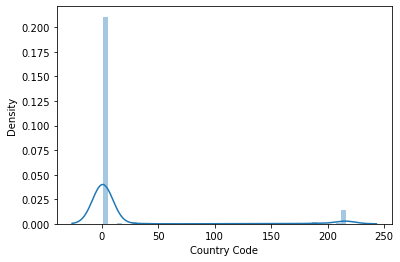

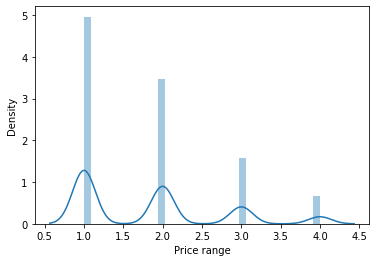

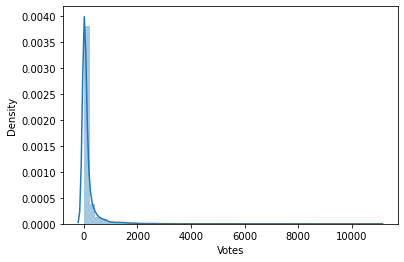

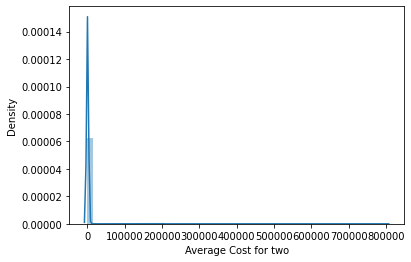

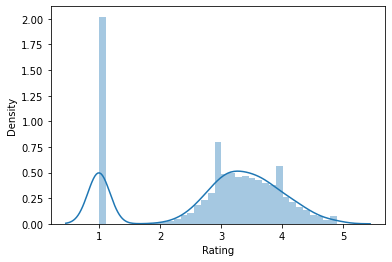

In [ ]:
for i,c in enumerate(num_cols):
    plt.figure()
    sns.distplot(data_zomato[c])


In [ ]:
data_zomato["Average Cost for two"].max()

800000

In [ ]:
data_zomato[data_zomato["Average Cost for two"]==data_zomato["Average Cost for two"].max()]

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
9283,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta","Italian, Continental",Indonesian Rupiah(IDR),No,No,No,No,3,1498,800000,4.1
9284,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta","Asian, Indonesian, Western",Indonesian Rupiah(IDR),No,No,No,No,3,873,800000,4.6


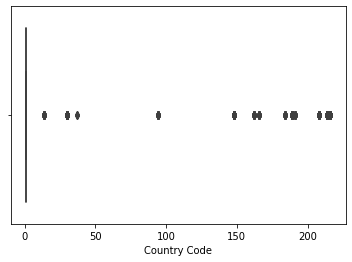

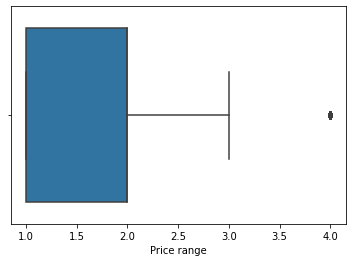

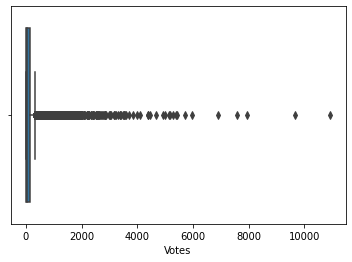

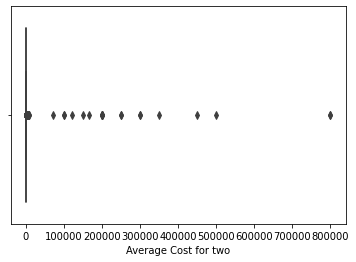

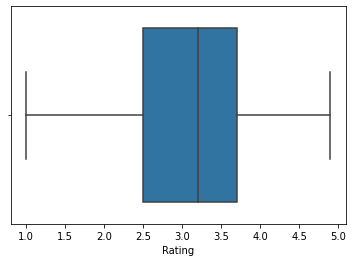

In [ ]:
for i,c in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(data_zomato[c], data=data_zomato)

In [ ]:
data_zomato["Has Online delivery"]

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9542, dtype: object

In [ ]:
def remove_outliers(v):
    sorted(data_zomato[v])
    q25, q75 = percentile(data_zomato[v],25), percentile(data_zomato[v],75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    data_zomato[v]=np.where(data_zomato[v]>upper,upper,data_zomato[v])
    data_zomato[v]=np.where(data_zomato[v]<lower,lower,data_zomato[v])
    return data_zomato[v]

In [ ]:
for i in num_cols:
    data_zomato[i] = remove_outliers(i)

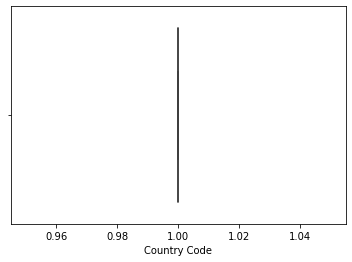

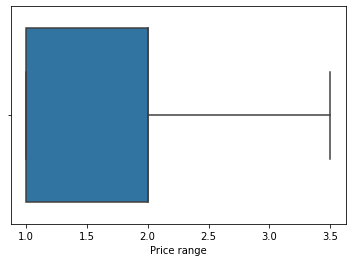

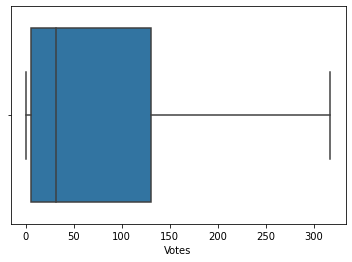

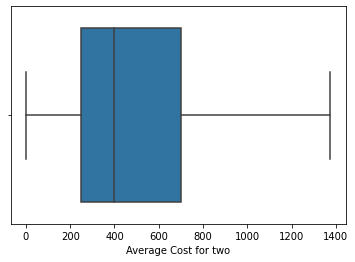

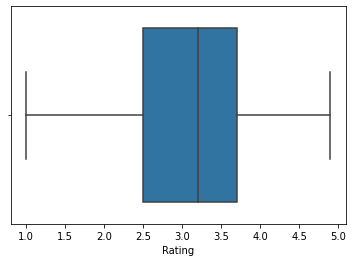

In [ ]:
for i,c in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(data_zomato[c])

In [ ]:
nonnum_col = [col for col in data_zomato.columns if col not in num_cols]
nonnum_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu']

In [ ]:
data_zomato = data_zomato.drop(columns=["Restaurant Name","Locality","Locality Verbose","Is delivering now","Switch to order menu"])

## **DATA PROCESSING II** : Encoding Categorical data.

In [ ]:
nonnum_col = [col for col in data_zomato.columns if col not in num_cols]
nonnum_col

['City',
 'Address',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery']

In [ ]:
vals_to_replace = {'Yes':'1', 'No':'0'}
data_zomato["Has Online delivery"] = data_zomato["Has Online delivery"].map(vals_to_replace)
data_zomato['Has Table booking'] = data_zomato['Has Table booking'].map(vals_to_replace)


In [ ]:
data_zomato['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(Œ£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Sri Lankan Rupee(LKR)       20
Qatari Rial(QR)             20
Name: Currency, dtype: int64

In [ ]:
currencies=pd.get_dummies(data_zomato['Currency'],drop_first=True)
currencies

,Brazilian Real(R$),Dollar($),Emirati Diram(AED),Indian Rupees(Rs.),Indonesian Rupiah(IDR),NewZealand($),Pounds(Œ£),Qatari Rial(QR),Rand(R),Sri Lankan Rupee(LKR),Turkish Lira(TL)
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,1
9547,0,0,0,0,0,0,0,0,0,0,1
9548,0,0,0,0,0,0,0,0,0,0,1
9549,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
cuisines=list(data_zomato['Cuisines'])

In [ ]:
cuisines = np.unique(cuisines)

In [ ]:
unq_cuisines = []
for i in range(len(cuisines)):
    unq = cuisines[i].split(",")
    for i in range(len(unq)):
#         print(unq[i])
        unq[i] = unq[i].lstrip()
#         print(unq[i])
        unq_cuisines.append(unq[i])


In [ ]:
unq_cuisines2 = np.unique(unq_cuisines)
unq_cuisines_dict = {i:unq_cuisines.count(i) for i in unq_cuisines2}
unq_cuisines_dict = dict( sorted(unq_cuisines_dict.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
top100_cuisines = dict(list(unq_cuisines_dict.items())[:100])
top100_cuisines

{'Afghani': 11,
 'African': 5,
 'American': 184,
 'Andhra': 10,
 'Arabian': 22,
 'Asian': 148,
 'Australian': 5,
 'Awadhi': 9,
 'BBQ': 18,
 'Bakery': 107,
 'Bar Food': 25,
 'Bengali': 15,
 'Beverages': 75,
 'Bihari': 4,
 'Biryani': 43,
 'Brazilian': 16,
 'Breakfast': 26,
 'British': 13,
 'Burger': 84,
 'Burmese': 7,
 'Cafe': 229,
 'Cajun': 9,
 'Caribbean': 7,
 'Charcoal Grill': 4,
 'Chettinad': 7,
 'Chinese': 556,
 'Coffee and Tea': 17,
 'Contemporary': 8,
 'Continental': 382,
 'Curry': 5,
 'Desserts': 142,
 'Diner': 6,
 'European': 101,
 'Fast Food': 297,
 'Filipino': 7,
 'Finger Food': 52,
 'French': 23,
 'Fusion': 4,
 'German': 8,
 'Goan': 17,
 'Greek': 15,
 'Grill': 21,
 'Gujarati': 8,
 'Hawaiian': 6,
 'Healthy Food': 50,
 'Hyderabadi': 15,
 'Ice Cream': 33,
 'Indian': 44,
 'Indonesian': 12,
 'International': 16,
 'Italian': 398,
 'Japanese': 74,
 'Juices': 19,
 'Kashmiri': 13,
 'Kebab': 5,
 'Kerala': 15,
 'Kiwi': 5,
 'Korean': 14,
 'Latin American': 9,
 'Lebanese': 50,
 'Lucknowi'

In [ ]:
j = 0
for i in top100_cuisines:
    data_zomato.insert(loc=11+j,column=i,value=0)
    j = j+1

In [ ]:
for cuisine in top100_cuisines:
    data_zomato[cuisine]=data_zomato['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

In [ ]:
data_zomato.columns

Index(['Country Code', 'City', 'Address', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range', 'Votes',
       'Average Cost for two',
       ...
       'Curry', 'Kebab', 'Kiwi', 'Modern Indian', 'Parsi', 'Sri Lankan',
       'Bihari', 'Charcoal Grill', 'Fusion', 'Maharashtrian'],
      dtype='object', length=111)

In [ ]:
cities=list(data_zomato['City'])
cities2 = np.unique(cities)
unq_cities_dict = {i:cities.count(i) for i in cities2}
unq_cities_dict = dict( sorted(unq_cities_dict.items(), key=operator.itemgetter(1),reverse=True))
top10_cities = dict(list(unq_cities_dict.items())[:10])
for city in top10_cities:
    data_zomato[city]=data_zomato['City'].apply(lambda x: 1 if city in x else 0)

In [ ]:
data_zomato.drop(['Country Code',"City",'Currency','Address','Cuisines'],axis=1,inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)
data_zomato.columns

Index(['Has Table booking', 'Has Online delivery', 'Price range', 'Votes',
       'Average Cost for two', 'Rating', 'North Indian', 'Chinese', 'Italian',
       'Continental',
       ...
       'New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Amritsar', 'Bhubaneshwar', 'Guwahati', 'Lucknow'],
      dtype='object', length=116)

In [ ]:
data_zomato.columns

Index(['Has Table booking', 'Has Online delivery', 'Price range', 'Votes',
       'Average Cost for two', 'Rating', 'North Indian', 'Chinese', 'Italian',
       'Continental',
       ...
       'New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Amritsar', 'Bhubaneshwar', 'Guwahati', 'Lucknow'],
      dtype='object', length=116)

In [ ]:
z = data_zomato["Rating"]

In [ ]:
data_zomato.drop(['Rating'],axis=1,inplace=True)

# SUMMARY OF DATA CLEANING AND DATA PROCESSING:

The data set initially consisted of 9551 rows and 19 columns. The cuisines column in the data set had 9 null values, as the number is negligible in regards to the dataset those entries were dropped."Restaurant ID", "Longitude", "Latitude" columns were redundant and so were removed. 
The shape of data was understood from plots of numerical columns. The data was is not uniformly distributed.
A box plot is an excellent way to visualize and get rid of outliers. All the outliers were removed from my numerical data columns.
To convert categorical data to numeric 3 different approaches were used. YES/NO columns were made 0/1. The currencies column was separated into separate currencies using (.get_dummies), and for cuisines the multiple cuisines were separated from each entry, top 100 were identified and then placed as columns.

## Final DATASET.

In [ ]:
data_zomato.shape

(9542, 115)

# FEATURE EXTRACTION: ExtraTreesRegressor() is used to identify features and their importance

**As indicated from graphs, "Votes" have a very large impact on "Rating" or is an over contributor. Removing "Votes" was considered at a point to remove bias, but eventually, I decided to go with it as in the real world it indeed is an important feature for determining "Rating".**

 

In [ ]:
X=data_zomato.iloc[:,:115]
y=z

In [ ]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

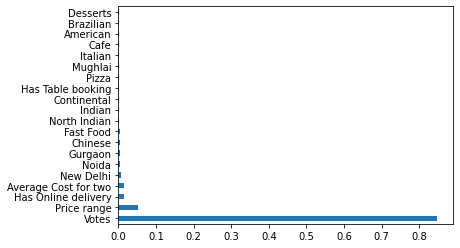

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# data_zomato.drop(['Votes'],axis=1,inplace=True)

In [ ]:
# X=data_zomato.iloc[:,:204]
# y=z

In [ ]:
# model=ExtraTreesRegressor()
# model.fit(X,y)

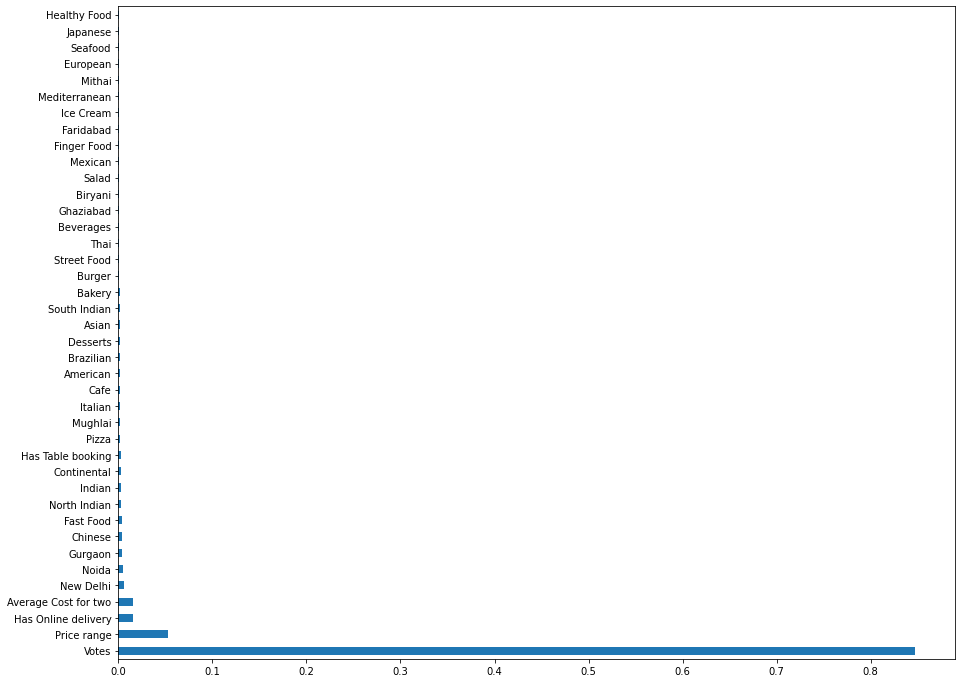

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(15,12))
final_features = ranked_features.nlargest(40)
final_features.plot(kind='barh')
plt.show()

In [ ]:
for i in data_zomato.columns:
  if i not in final_features:
    data_zomato.drop([i],axis=1,inplace=True)

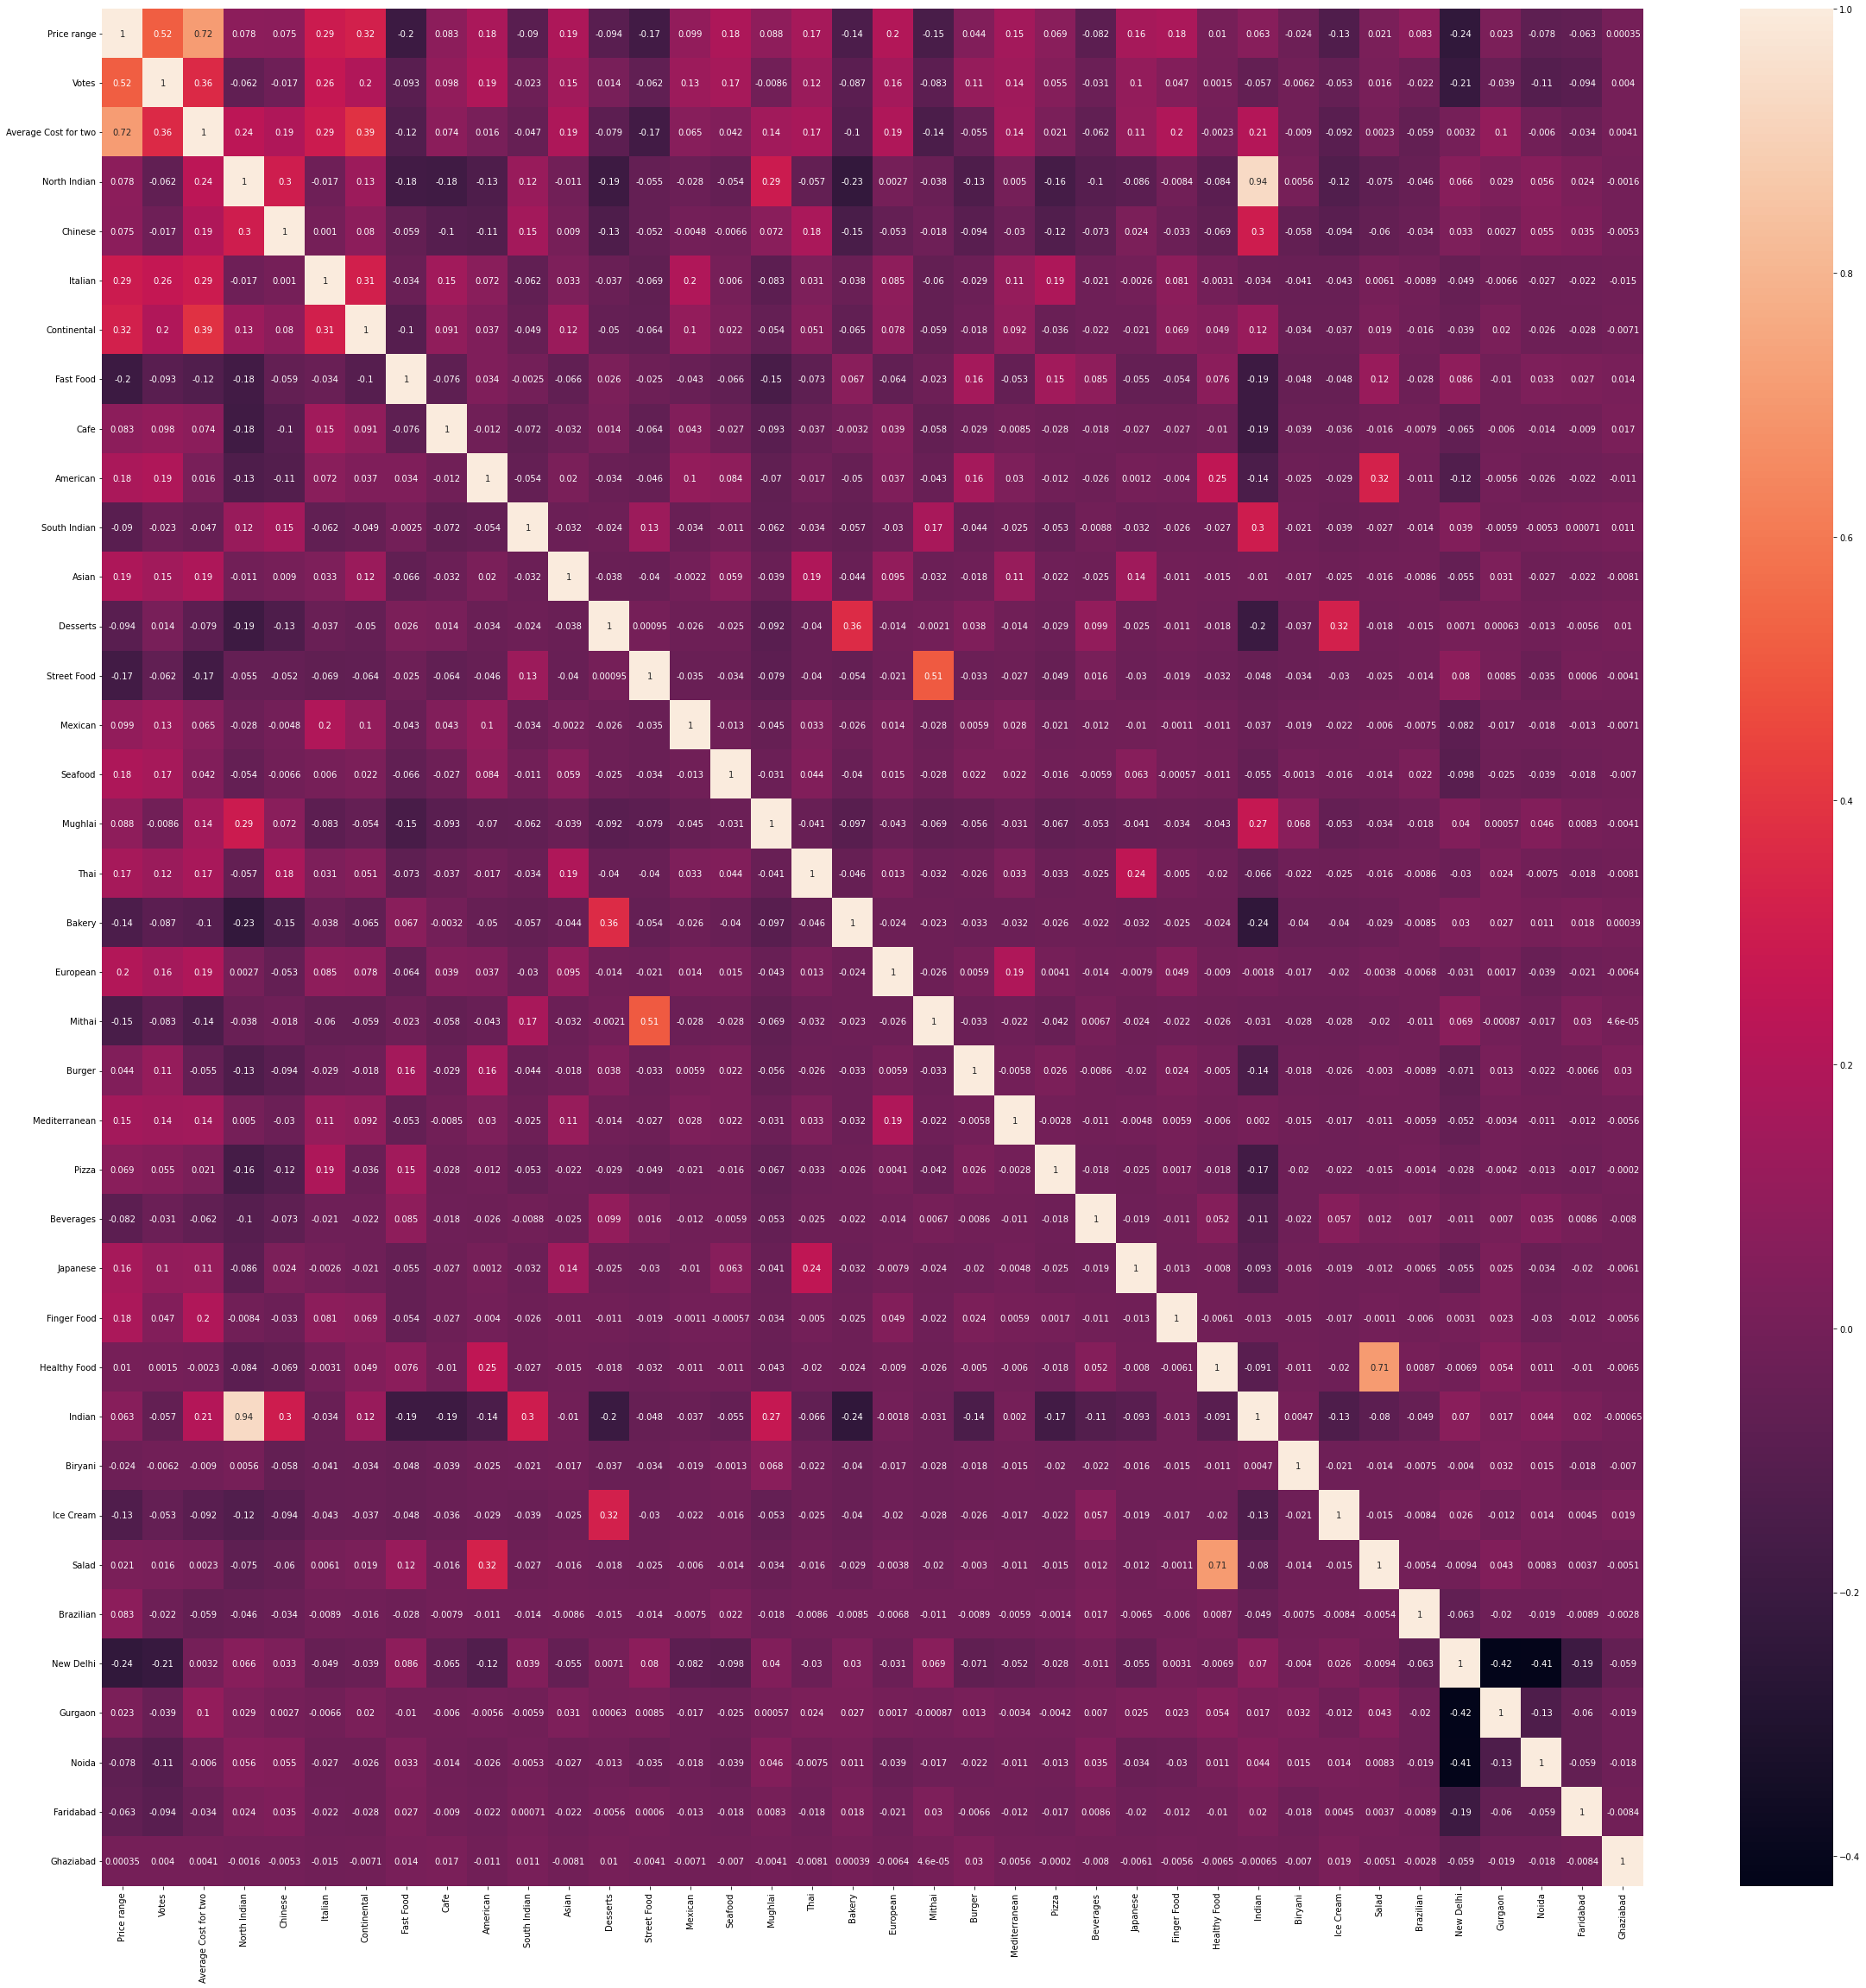

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(data_zomato.corr(),annot=True)

#MODELS:

## Scaling:

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data_zomato)
scaled_features = scaler.transform(data_zomato)

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_e,y_train_e)
y_testing_predicted_e=model.predict(X_test_e)

MSE on entire dataset:

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_Test = mean_squared_error(y_test_e,y_testing_predicted_e)
print (MSE_Test)

0.6504166625480517


## Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf_random.predict(X_test)

R2 on entire dataset : 

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9184955387212337

## K-means

### Silhouette Method and Elbow Method

In [ ]:
sse = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

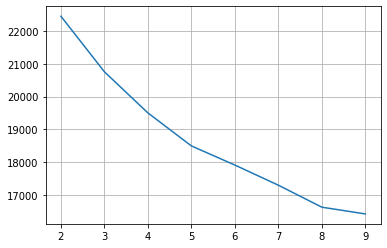

In [ ]:
plt.plot([i for i in range(2,10)],sse)
plt.grid()

In [ ]:
from sklearn.metrics import silhouette_score
sse = []
slc=[]
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  slc.append(silhouette_score(scaled_features, kmeans.labels_))

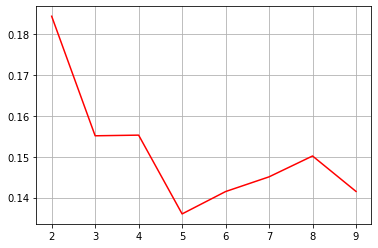

In [ ]:
plt.plot([i for i in range(2,10)],slc,color='red')
plt.grid()

In [ ]:
kmeans = KMeans(n_clusters=4,init='random')
kmeans = kmeans.fit(scaled_features)
clusters_assigned = kmeans.predict(scaled_features)
centroids = kmeans.cluster_centers_

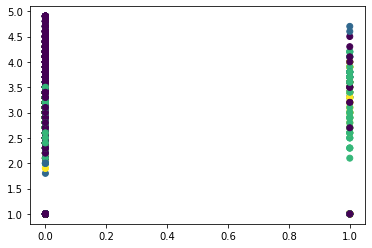

In [ ]:
plt.scatter(scaled_features[:,31],z,c=clusters_assigned)

## Unsupervised + Supervised#

Kmeans followed by Linear Regression


Kmeans followed by Random Forest

In [ ]:
X_0 = data_zomato[clusters_assigned ==0]
X_1 = data_zomato[clusters_assigned ==1]
y_0 = z[clusters_assigned ==0]
y_1 = z[clusters_assigned ==1]
X_2 = data_zomato[clusters_assigned ==2]
y_2 = z[clusters_assigned ==2]
X_3 = data_zomato[clusters_assigned ==3]
y_3 = z[clusters_assigned ==3]


In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2)

MSE by LR on cluster 0 :

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train_0,y_train_0)
y_testing_predicted=model.predict(X_test_0)
MSE_Test = mean_squared_error(y_test_0,y_testing_predicted)
print (MSE_Test)

0.5668417856802702


In [ ]:
rf_random=RandomForestRegressor()
rf_random.fit(X_train_0,y_train_0)

RandomForestRegressor()

In [ ]:
y_pred_0=rf_random.predict(X_test_0)

R2 score on cluster 0 : 

In [ ]:
metrics.r2_score(y_test_0,y_pred_0)

0.9081798018005456

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.1)

MSE by LR on cluster 1 : 

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train_1,y_train_1)
y_testing_predicted=model.predict(X_test_1)
MSE_Test = mean_squared_error(y_test_1,y_testing_predicted)
print (MSE_Test)

0.37291825370629866


In [ ]:
rf_random=RandomForestRegressor()
rf_random.fit(X_train_1,y_train_1)

RandomForestRegressor()

In [ ]:
y_pred_1=rf_random.predict(X_test_1)

R2 score on cluster 1 : 

In [ ]:
metrics.r2_score(y_test_1,y_pred_1)

0.7992888783170141

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1)

MSE by LR on cluster 2 : 

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train_2,y_train_2)
y_testing_predicted=model.predict(X_test_2)
MSE_Test = mean_squared_error(y_test_2,y_testing_predicted)
print (MSE_Test)

0.7014236289944598


In [ ]:
rf_random=RandomForestRegressor()
rf_random.fit(X_train_2,y_train_2)

RandomForestRegressor()

In [ ]:
y_pred_2=rf_random.predict(X_test_2)

R2 score on cluster 2 : 

In [ ]:
metrics.r2_score(y_test_2,y_pred_2)

0.920661392833108

In [ ]:
 X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.1)

MSE by LR on cluster 3 : 

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train_3,y_train_3)
y_testing_predicted=model.predict(X_test_3)
MSE_Test = mean_squared_error(y_test_3,y_testing_predicted)
print (MSE_Test)

0.8276223080397008


In [ ]:
rf_random=RandomForestRegressor()
rf_random.fit(X_train_3,y_train_3)

RandomForestRegressor()

In [ ]:
y_pred_3=rf_random.predict(X_test_3)

R2 score on cluster 3 : 

In [ ]:
metrics.r2_score(y_test_3,y_pred_3)

0.953618384878913

# CONCLUSION:

The idea of fitting regression inside a cluster did show positive outcomes. The improvement might not be drastic but was evident as random forest regression also showed improvement when run inside an cluster. 

Using SOM might give better results than Kmeans as I noiced the random initialization of cluster centers had good enough effect on silhouette_score.